In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [95]:
def within_cluster_scatter(X, cluster_centers):
    return sum(np.min(cdist(X, cluster_centers, 'euclidean'), axis=1)) / X.shape[0]

In [96]:
# prepare data
X = df[[str(i) for i in range(1, 26)]].to_numpy()

# generate null model
np.random.seed(69420)
B = 100
n_samples = X.shape[0] // 2

Xn = np.random.choice([-2, -1, 1, 2], size=(B, n_samples, 25))
# Xn = np.random.randint(-2, 3, size=(B, n_samples, 25))
# idx = np.random.randint(X.shape[0], size=(B, n_samples))
# Xn = X[idx]


# within cluster scatter lists
X_wcs = []
Xn_wcs = [[] for _ in range(B)]

K = 25
for k in range(1, 25):
    print(k)

    # true data
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(X)

    wcs = within_cluster_scatter(X, kmeanModel.cluster_centers_)
    X_wcs.append(wcs)
    
    # null model
    for i in range(B):
        n = Xn[i]
        kmeanModel = KMeans(n_clusters=k, random_state=0)
        kmeanModel.fit(n)

        wcs = within_cluster_scatter(n, kmeanModel.cluster_centers_)
        Xn_wcs[i].append(wcs)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [153]:
n_samples

396

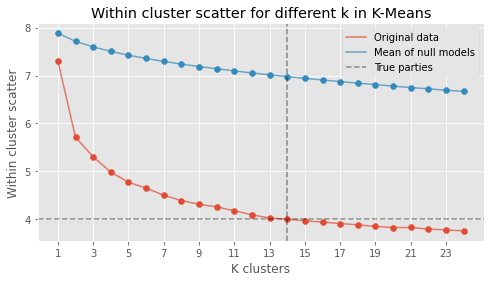

In [110]:
true_means = df.groupby('CurrentPartyCode').agg(
    {str(i): 'mean' for i in range(1, 26)}
).to_numpy()
true_gap = within_cluster_scatter(X, true_means)

x = np.arange(1, K)
Wk = np.array(X_wcs)
Wkb = np.array(Xn_wcs)
Wkb_mean = np.mean(Wkb, axis=0)
Wkb_std = np.std(Wkb, axis=0)
sks = Wkb_std * np.sqrt(1 + 1/B)

fig, ax = plt.subplots(figsize=(8,4))

# ax.set_ylim(3,8)
ax.set_title('Within cluster scatter for different k in K-Means')
ax.set_xlabel('K clusters')
ax.set_ylabel('')
ax.set_xticks(x[::2])

ax.plot(x, Wk, alpha=.7, label='Original data')
ax.plot(x, Wkb_mean, alpha=.7, label='Mean of null models')

ax.scatter(x, Wk)
ax.scatter(x, Wkb_mean)

ax.set_ylabel('Within cluster scatter')
ax.axhline(true_gap, color='black', alpha=.4, label='True parties', linestyle='--')
ax.axvline(14, color='black', alpha=.4, linestyle='--')
ax.legend()

In [111]:
fig.savefig('../figs/elbow.svg')

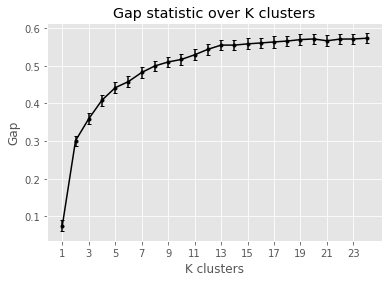

In [158]:
gap = np.mean(np.log(Wkb), axis=0) - np.log(Wk)

fig, ax = plt.subplots()
ax.errorbar(x, gap, yerr=sks/2, fmt='.', capsize=2, color='black')
# ax.scatter(x, gap)
ax.plot(x, gap, color='black')

ax.set_xlabel('K clusters')
ax.set_ylabel('Gap')
ax.set_title('Gap statistic over K clusters')

ax.set_xticks(x[::2]);

In [159]:
sks

array([0.0278363 , 0.02714553, 0.02827177, 0.02870599, 0.02832993,
       0.02827314, 0.02829609, 0.02797008, 0.02836138, 0.02853307,
       0.02855716, 0.02941537, 0.02843938, 0.02786272, 0.02947201,
       0.02905112, 0.02998374, 0.02872651, 0.0298735 , 0.02891869,
       0.0288885 , 0.02815691, 0.02820089, 0.02645056])

In [157]:
for i in range(23):
    if gap[i] >= gap[i+1] - sks[i+1]:
        print(i+1)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [160]:
fig.savefig('../figs/gap_statistic.svg')